In [1]:
# from clustering_imports import *
from clustering_driver import *

In [16]:
!./clustering_driver.py build -i ~/images_from_structures.npy -k 6 -R 30 -C 25 -o models
!ls models*

Loaded Array:
(256, 128, 128)
2023-09-06 18:48:02.360 | INFO     | __main__:hierarchify:268 - 256,16384,6,30,1.6472251060040435,0.014389889001904521
Building hierarchical clustering
models_tree_data_list.npy   models_tree_node_vals.npy
models_tree_hierarchy.json


In [9]:
!./clustering_driver.py load -t models_tree_hierarchy.json -G
!ls *.graphml

Loading hierarchical clustering
256
tree_representation.graphml


In [14]:
!./clustering_driver.py likelihood --models models_tree_hierarchy.json --images ~/stuff/cryoem/Ensemble-reweighting-using-Cryo-EM-particles/processed_images/images_experimental.npy

Loaded Array:
(2048, 128, 128)
2023-09-06 17:51:28.732 | INFO     | likelihood_scratch:evaluate_tree_neighbor_likelihood:80 - tree_match_likelihood time: 3.9189007509994553
2023-09-06 17:51:30.599 | INFO     | likelihood_scratch:evaluate_tree_cluster_likelihood:113 - tree_cluster_likelihood time: 1.8653083099998184
2023-09-06 17:51:30.602 | INFO     | likelihood_scratch:search_tree_likelihoods:150 - lambda: 0.38899504008494656
2023-09-06 17:51:52.093 | INFO     | likelihood_scratch:evaluate_global_neighbor_likelihood:181 - global_neighbor_likelihood time: 21.208760815999995
2023-09-06 17:52:13.446 | INFO     | likelihood_scratch:evaluate_global_likelihood:206 - global_likelihood time: 21.350740923997364
2023-09-06 17:52:13.449 | INFO     | likelihood_scratch:global_scope_likelihoods:226 - lambda: 0.38899504008494656


## Generate Histograms

Text(0.5, 1.0, 'global scope likelihood')

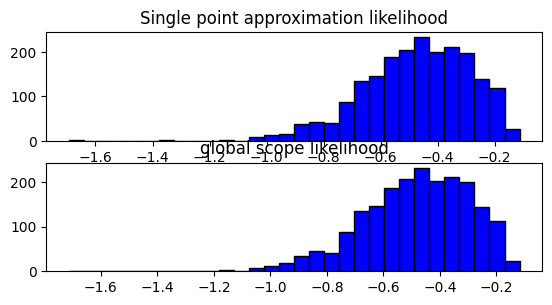

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_squared_error

search_tree = pd.read_csv("search_tree_likelihoods.csv")
global_likelihood = pd.read_csv("all_pairs_likelihoods.csv")

spl = np.array(search_tree["single_point_likelihood"])
al = np.array(global_likelihood["area_likelihood"])

spl_avg = np.mean(spl)
al_avg = np.mean(al)

std_dev = lambda arr, avg: np.sqrt(np.divide(np.sum(np.array([np.square(x - avg) for x in arr])), arr.shape[0] - 1))

spl_sigma = std_dev(spl, spl_avg)
al_sigma = std_dev(al, al_avg)

scotts = lambda arr, std_dev: 3.5 * std_dev / (arr.shape[0] **(1/3))

bin_widths = [scotts(spl, spl_sigma), scotts(al, al_sigma)]
bin_count = lambda arr, bin_width: int((max(arr) - min(arr)) / bin_width)

# print(bin_widths)
# max(spl) - min(spl)
plt.subplot(3,1,1)
plt.hist(spl, bins=bin_count(spl, bin_widths[0]),color='blue', edgecolor='black')
plt.title("Single point approximation likelihood")

plt.subplot(3,1,2)
plt.hist(al, bins=bin_count(al, bin_widths[1]), color='blue', edgecolor='black')
plt.title("global scope likelihood")

# bin_w
# error = [np.sqrt(i) for i in np.square(np.array(search_tree["single_point_likelihood"]) - np.array(global_likelihood["area_likelihood"]))]


# plt.subplot(3,1,2)
# plt.plot(t,error, linewidth=2)
# plt.xlabel("image index")
# plt.ylabel("magnitude")
# plt.title("error")
# plt.show()

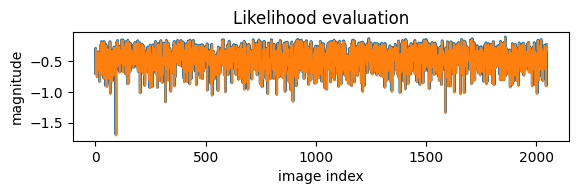

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import mean_squared_error

search_tree = pd.read_csv("search_tree_likelihoods.csv")
global_likelihood = pd.read_csv("all_pairs_likelihoods.csv")

t = [i for i in range(len(search_tree["single_point_likelihood"]))]
plt.subplot(3, 1, 3)
plt.plot(t, search_tree["single_point_likelihood"], linewidth=2)
plt.plot(t, global_likelihood["area_likelihood"], linewidth=1.1)
plt.xlabel("image index")
plt.ylabel("magnitude")
plt.title("Likelihood evaluation")
plt.show()

In [12]:
!./clustering_driver.py search -t models_tree_hierarchy.json -M ~/images_from_structures.npy -G

256
Loaded Array:
(256, 128, 128)
Searching hierarchical clustering
2023-09-06 16:38:31.048 | INFO     | __main__:search_tree_associations:87 - 0.237280153996835
2023-09-06 16:38:33.685 | INFO     | __main__:all_pairs_associations:130 - 2.6368587920005666
